In [26]:
# 读取图像信息
import shutil
import os


training_path = '/Users/anlei/Documents/AllCode/Jupyter/5DEEP/5Deep-final/images5DEEP/raw_image/training/'
train_data_path = '/Users/anlei/Documents/AllCode/Jupyter/5DEEP/5Deep-final/images5DEEP/raw_image/train_data/'
dirs = os.listdir(training_path)
for item in dirs:
    item_label = item.split('_')[0]
    des_path = train_data_path+item_label
    if not os.path.exists(des_path):
        os.makedirs(des_path)
    shutil.copyfile(os.path.join(training_path, item), os.path.join(des_path, item))


testing_path = '/Users/anlei/Documents/AllCode/Jupyter/5DEEP/5Deep-final/images5DEEP/raw_image/testing/'
test_data_path = '/Users/anlei/Documents/AllCode/Jupyter/5DEEP/5Deep-final/images5DEEP/raw_image/test_data/'
dirs = os.listdir(testing_path)
for item in dirs:
    item_label = item.split('_')[0]
    des_path = test_data_path+item_label
    if not os.path.exists(des_path):
        os.makedirs(des_path)
    shutil.copyfile(os.path.join(testing_path, item), os.path.join(des_path, item))

In [27]:
# import packages
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


# 调试  在PyCharm中显示绘图
# import matplotlib
# matplotlib.use('Agg')
# 图像增强
from keras.preprocessing.image import ImageDataGenerator

# 解决使用CUP运行时的问题
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [28]:

train_data_path = '/Users/anlei/Documents/AllCode/Jupyter/5DEEP/5Deep-final/images5DEEP/raw_image/train_data/'
test_data_path = '/Users/anlei/Documents/AllCode/Jupyter/5DEEP/5Deep-final/images5DEEP/raw_image/test_data/'

In [29]:
# 声明一个ImageDataGenerator类对象，并给出你需要进行的数据增强选项
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
# 调用.flow_from_director()方法，第一个为数据集路径。生成数据集及标签
train_generator = train_datagen.flow_from_directory(
        train_data_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')
# 用同样的方法加载测试集
test_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
        test_data_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')




Found 50000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.


In [44]:

#电脑实在跑不动了。。。。调整了参数减短训练时间。。
batch_size = 256
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224,224,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


# 调整参数和相关元素

# 下面参数没跑完，跑了大约25个epochs，最优大约53%，loss是1.3%

# classes = 10
# batch_size = 256
# epochs = 50

# model = Sequential()
# model.add(Conv2D(32, (3, 3), padding='same', input_shape=(224,224,3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(128, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(classes_num))
# model.add(Activation('softmax'))

# 编译
# 损失函数 loss：模型试图最小化的目标函数。它可以是现有损失函数的字符串标识符
# 优化器 optimizer：它可以是现有优化器的字符串标识符，如 rmsprop 或 adagrad，也可以是 Optimizer 类的实例  
# Adam 优化器   keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# 评估标准 metrics：对于任何分类问题，你都希望将其设置为 metrics = ['accuracy']。评估标准可以是现有的标准的字符串标识符，
# 也可以是自定义的评估标准函数。
# opt = keras.optimizers.rmsprop(lr=0.01, decay=1e-6)

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'])

In [45]:
# 模型的总结
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 52, 52, 64)      

In [46]:
history = model.fit_generator(train_generator, 
                           steps_per_epoch=batch_size, 
                           epochs=epochs,
                           verbose=1,
                           validation_data=test_generator, 
                           shuffle=True)
score = model.evaluate(test_generator, verbose=0)

Epoch 1/10
256/256 [==============================] - 241s 942ms/step - loss: 2.3727 - accuracy: 0.1052 - val_loss: 2.2989 - val_accuracy: 0.1498
Epoch 2/10
256/256 [==============================] - 246s 960ms/step - loss: 2.2444 - accuracy: 0.1610 - val_loss: 2.0559 - val_accuracy: 0.1966
Epoch 3/10
256/256 [==============================] - 239s 935ms/step - loss: 2.1567 - accuracy: 0.2171 - val_loss: 2.0477 - val_accuracy: 0.2676
Epoch 4/10
256/256 [==============================] - 245s 957ms/step - loss: 2.0784 - accuracy: 0.2499 - val_loss: 1.9379 - val_accuracy: 0.2682
Epoch 5/10
256/256 [==============================] - 241s 941ms/step - loss: 2.0228 - accuracy: 0.2722 - val_loss: 2.0380 - val_accuracy: 0.2770
Epoch 6/10
256/256 [==============================] - 238s 931ms/step - loss: 1.9705 - accuracy: 0.2841 - val_loss: 1.8619 - val_accuracy: 0.3140
Epoch 7/10
256/256 [==============================] - 240s 937ms/step - loss: 1.8988 - accuracy: 0.3188 - val_loss: 2.3376 -

In [51]:
# 保存模型
# 它保存了模型的图结构，但应该又保存模型的初始化参数
model.save('5DEEP.h5')
# 它只保存了模型的参数，但并没有保存模型的图结构
model.save_weights('5DEEP-weights.h5')

In [48]:
# 打印  loss和acc
print('Test loss', score[0])
print('Test accuracy',score[1])

Test loss 1.105835199356079
Test accuracy 0.41280001401901245


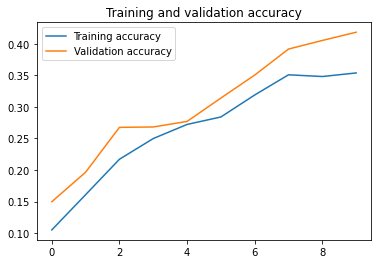

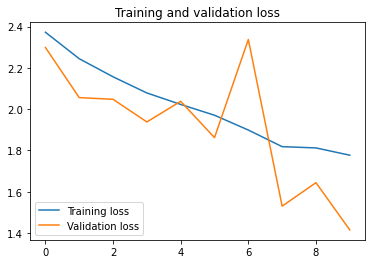

In [50]:
# 绘图
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()